<a href="https://colab.research.google.com/github/darshannayak21/bml/blob/main/knn7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Accuracy: 88.33%
Testing Accuracy: 83.33%


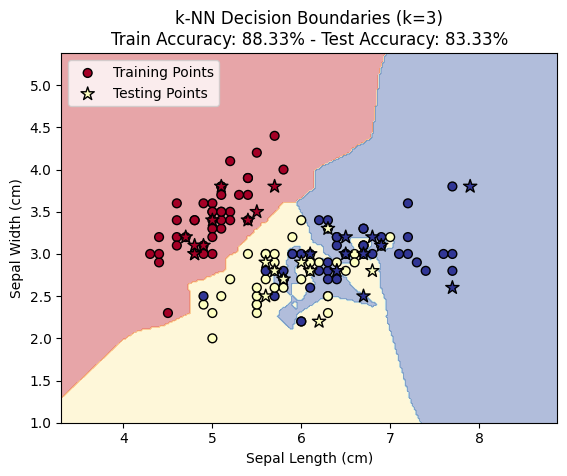

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # We take only the first two features for 2D visualization (sepal length and sepal width)
y = iris.target  # Target labels (species)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the training and testing sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Compute accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

# Create a mesh grid to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict for every point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# Plot training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, edgecolor='k', cmap=plt.cm.RdYlBu, label='Training Points')
# Plot testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, edgecolor='k', marker='*', cmap=plt.cm.RdYlBu, label='Testing Points')

# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title(f'k-NN Decision Boundaries (k=3)\nTrain Accuracy: {train_accuracy*100:.2f}% - Test Accuracy: {test_accuracy*100:.2f}%')

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

